[[445.72452766   0.         173.58412743]
 [  0.         445.72452766 149.79558372]
 [  0.           0.           1.        ]]


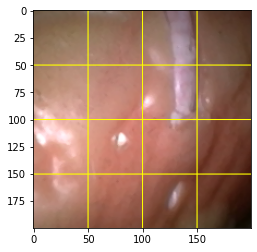

(200, 200, 200, 3)
(200, 200, 200, 1)
0


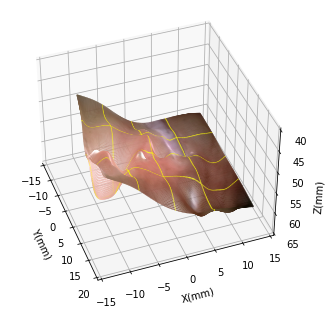

1


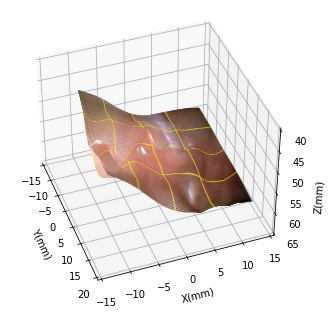

2


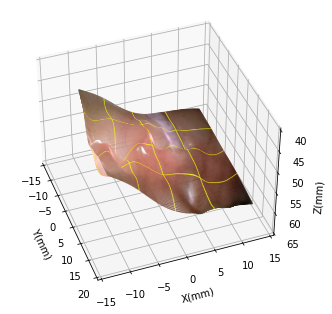

3


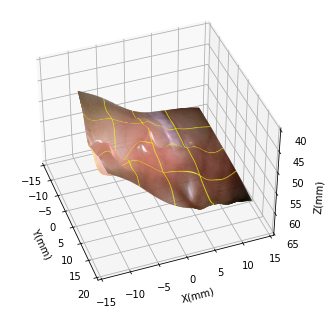

4


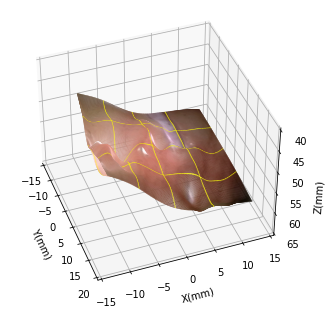

5


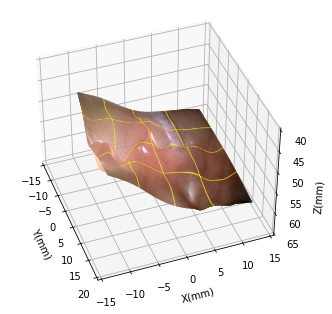

6


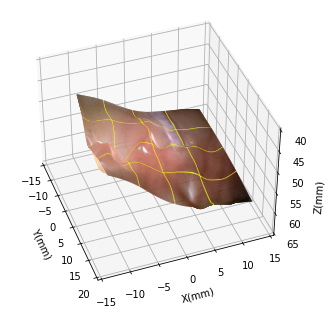

7


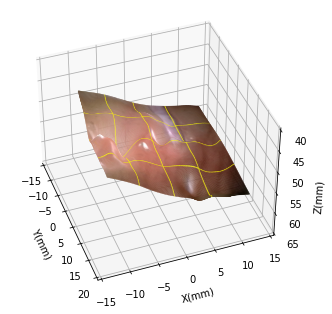

8


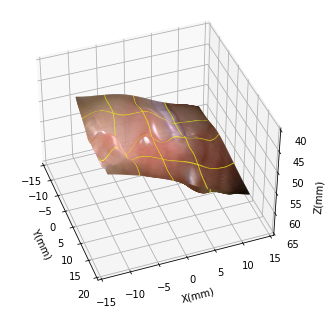

9


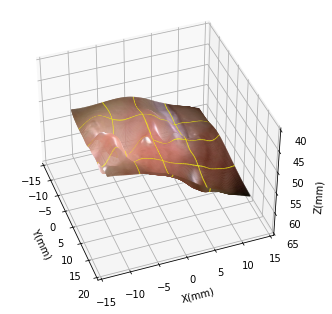

10


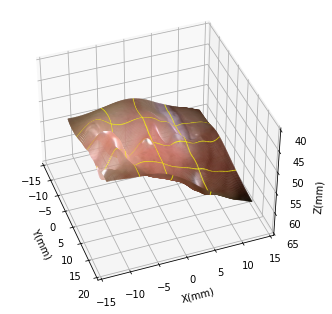

11


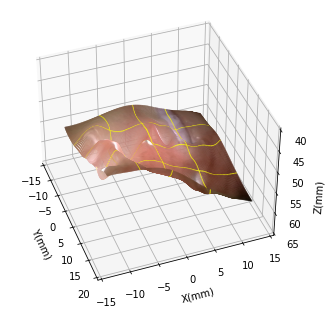

12


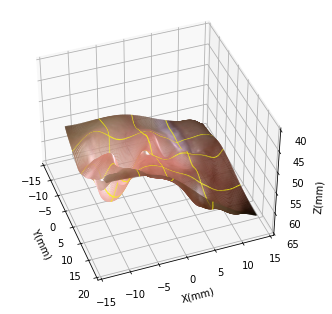

13


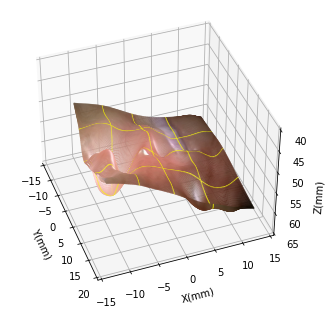

14


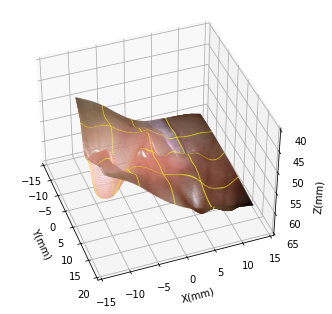

15


In [ ]:
import numpy as np
import time
from collections import namedtuple
from read_images import *

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
matrix = np.mat( [[445.72452766,   0.,         173.58412743  ],
                 [  0.,         445.72452766,  149.79558372   ],
                 [  0.,           0.,           1.           ]])
print(matrix)


def cal_xyz(disps,right_ims,batch_size,img_size, x0, y0):
    b = 5.520739
    #x = b*ur/d
    #y = b*vr/d
    #z = b*f/d
    x = np.array([i for i in range(1,1+img_size)])
    y = np.array([i for i in range(1,1+img_size)])
    X, Y = np.meshgrid(x, y)

    X = X + y0
    Y = Y + x0

    X = np.expand_dims(X, [0,3])
    Y = np.expand_dims(Y, [0,3])

    X = np.tile(X,[batch_size,1,1,1])
    Y = np.tile(Y,[batch_size,1,1,1])
    
    out_X = 5.520739*(X - 173.584127434)/disps
    out_Y = 5.520739*(Y - 149.79558372)/disps
    out_Z = 5.520739*445.72452766/disps
    out_I = right_ims/255
    return out_X,out_Y,out_Z,out_I

#source_img_path = '/home/ubuntu/jupyter_workspace/dataset/real_heart/invivo1_rect/'
source_img_path = '/home/ubuntu/jupyter_workspace/dataset/guijiaoheart/phantom1_rect/'####硅胶

batch_size = 200
img_size = 200

x0 = 54
y0 = 73

for i in range(0,1):
    ids  = range(i*batch_size,(i+1)*batch_size)
    left_ims, right_ims = read_stereo_images(source_img_path, ids)#50 256 256 3
    left_ims = left_ims[:,x0:(x0+200),y0:(y0+200),:]
    right_ims = right_ims[:,x0:(x0+200),y0:(y0+200),:]
    point_jihe = [i for i in range(50,200,50)]##右图加黄线
    #point_jihe = [i for i in range(40,200,40)]##右图加黄线
    for k in range(len(right_ims)):
        for l in range(200):
            for j in range(200):
                if (l in point_jihe) or (j in point_jihe):
                    right_ims[k][l][j] = [255.0,255.0,0.0]
    plt.figure("Image") # 图像窗口名称
    plt.imshow(right_ims[52]/255)
    plt.show()
    
    #disps = np.load('./groundtruth_z//W_disp_batch'+str(i)+'.npy')[:,32:288,14:270,:]###stylegan的
    #disps = np.load('./groundtruth_z//PSM_disp_batch.npy')[:,32:288,14:270,:]##PSM的
    #disps = np.load('./out/suiji_disps.npy')###测试随机的
    #disps = np.load('/home/ubuntu/jupyter_workspace/TPS/XuSiyuan/groundtruth_z//disp_batch_invivo20'+str(i)+'.npy')[:,32:288,14:270,:]#TPS的
    #disps = np.load('/home/ubuntu/jupyter_workspace/TPS/ChenHongRong/output/guijiao//disp_batch_invivo44'+str(i)+'.npy')[:,x0:(x0+200),y0:(y0+200),:]#学姐TPS结果
    #disps = np.load('/home/ubuntu/jupyter_workspace/TPS/ChenHongRong/output//disp_batch_invivo20'+str(i)+'.npy')[:,40:240,30:230,:]#学姐
    disps = np.load('/home/ubuntu/jupyter_workspace/TPS/ChenHongRong/output/guijiao//out_dd.npy')[:,x0:(x0+200),y0:(y0+200),:]#学姐交替结果
    #disps = np.load('/home/ubuntu/jupyter_workspace/stylegan2-master/groundtruth_z//W_disp_batch80.npy')[0:1,32:288,14:270,:]
    #disps = np.load('/home/ubuntu/jupyter_workspace/TPS/ChenHongRong/output/guijiao/TPSdisp_per_img.npy')[:,x0:(x0+200),y0:(y0+200),:]
    print(left_ims.shape)
    print(disps.shape)
    
    
    shijie_position_x,shijie_position_y,shijie_position_z,shijie_position_i = cal_xyz(disps,right_ims,batch_size,img_size,x0,y0)
    
    shijie_position_x = shijie_position_x.reshape([batch_size,-1])
    shijie_position_y = shijie_position_y.reshape([batch_size,-1])
    shijie_position_z = shijie_position_z.reshape([batch_size,-1])
    shijie_position_i = shijie_position_i.reshape([batch_size,-1,3])
    ##四角处理
    
    for j in range(batch_size):
        print(j)
        #fig = plt.figure()
        #ax = fig.add_subplot(111, projection='3d')
        #ax.scatter(shijie_position_y[j], shijie_position_x[j], -shijie_position_z[j], c=shijie_position_i[j], alpha=1)
        fig = plt.figure()
        ax = Axes3D(fig)
        ax.scatter3D(shijie_position_y[j], shijie_position_x[j], -shijie_position_z[j], c=shijie_position_i[j],s =0.1, 
                     norm = 1, alpha=1)

        ax.set_xlim(-15, 20)
        ax.set_ylim(-15, 15)
        ax.set_zlim(-65, -40)
        ax.view_init(elev=40., azim=-20.) 
        
        ax.set_xlabel('Y(mm)')
        ax.set_ylabel('X(mm)')
        ax.set_zlabel('Z(mm)')
        
        #ax.set_xticks([i for i in range(-10,10,4)])
        #ax.set_yticks([i for i in range(-10,8,4)])
        ax.set_zticks([-65,-60,-55,-50,-45,-40])
        ax.set_zticklabels(['65','60','55','50','45','40'])
        
        plt.savefig('./out/guijiao_3D//3D'+str((i-0)*batch_size+j)+'.png', dpi = 200, bbox_inches = 'tight',pad_inches = 0)
        plt.show()

In [7]:
import numpy as np

x = np.array([i for i in range(1,201)])
y = np.array([i for i in range(1,201)])
X, Y = np.meshgrid(x, y)

X = X + 6
Y = Y + 44

X = np.expand_dims(X, [0,3])
Y = np.expand_dims(Y, [0,3])

X = np.tile(X,[50,1,1,1])
Y = np.tile(Y,[50,1,1,1])

print(X.shape)
print(Y.shape)

def cal_xyz(disps,right_ims,batch_size,img_size):
    b = 5.49238
    #x = b*ur/d
    #y = b*vr/d
    #z = b*f/d
    shijie_position_x = np.zeros([batch_size,img_size*img_size])##x
    shijie_position_y = np.zeros([batch_size,img_size*img_size])##y
    shijie_position_z = np.zeros([batch_size,img_size*img_size])##z
    shijie_position_i = []##亮度
    #point_jihe = [i for i in range(40,200,40)]##右图加黄线
    for i in range(batch_size):
        shijie_position_i.append([])
        for x in range(img_size):#hang
            for y in range(img_size):#lie
                shijie_position_x[i,img_size*x+y] = 5.49238*(x-155.04+14.)/abs(disps[i,x,y,0])##lie
                shijie_position_y[i,img_size*x+y] = 5.49238*(y-143.00+32.)/abs(disps[i,x,y,0])##hang
                shijie_position_z[i,img_size*x+y] = 5.49238*649.78/abs(disps[i,x,y,0])
                
                    #r = hex(int(right_ims[i,x,y,0]))[2:]
                    #b = hex(int(right_ims[i,x,y,1]))[2:]
                    #g = hex(int(right_ims[i,x,y,2]))[2:]
                    #if len(r) == 1:
                    #    r = '0' + r
                    #if len(b) == 1:
                    #    b = '0' + b
                    #if len(g) == 1:
                    #    g = '0' + g
                    
                    #col = '#' + r + b + g
                col = [right_ims[i,x,y,0]/255, right_ims[i,x,y,1]/255, right_ims[i,x,y,2]/255]
                shijie_position_i[i].append(col)

    return shijie_position_x,shijie_position_y,shijie_position_z,shijie_position_i


[[14.28571429 12.5        11.11111111 ...  0.49019608  0.48780488
   0.48543689]
 [14.28571429 12.5        11.11111111 ...  0.49019608  0.48780488
   0.48543689]
 [14.28571429 12.5        11.11111111 ...  0.49019608  0.48780488
   0.48543689]
 ...
 [14.28571429 12.5        11.11111111 ...  0.49019608  0.48780488
   0.48543689]
 [14.28571429 12.5        11.11111111 ...  0.49019608  0.48780488
   0.48543689]
 [14.28571429 12.5        11.11111111 ...  0.49019608  0.48780488
   0.48543689]]
(50, 200, 200, 1)
(50, 200, 200, 1)


In [4]:
a = [i for i in range(40,200,40)]
print(a)
r = hex(255)[2:]
print(r)

[40, 80, 120, 160]
0xff


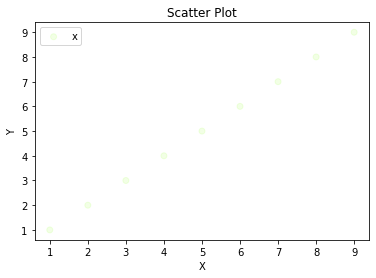

In [4]:
import numpy as np  
import matplotlib.pyplot as plt  
#产生测试数据  
x = np.arange(1,10)  
y = x  
z = []
for i in range(9):
    z.append([0.5,1,0])
z = np.array(z)
fig = plt.figure()  
ax1 = fig.add_subplot(111)  
#设置标题  
ax1.set_title('Scatter Plot')  
#设置X轴标签  
plt.xlabel('X')  
#设置Y轴标签  
plt.ylabel('Y')  
#画散点图  
ax1.scatter(x,y,c = z,marker = 'o', alpha=0.1)  
#设置图标  
plt.legend('x1')  
#显示所画的图  
plt.show() 

In [4]:
import numpy as np

import scipy.io as io


disps = np.load('/home/ubuntu/jupyter_workspace/TPS/ChenHongRong/output//out_dd.npy')[:,44:244,6:206,:]

disp = disps[52]

io.savemat('disp52.mat', {'disp':disp})


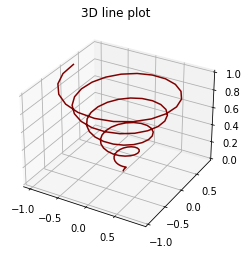

In [1]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection='3d')
z = np.linspace(0, 1, 100)
x = z * np.sin(30 * z)
y = z * np.cos(30 * z)

ax.plot3D(x, y, z, 'maroon')
ax.set_title('3D line plot')
plt.show()